In [1]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from matplotlib.animation import FuncAnimation
import glob
import numpy as np
import sys, os
import netCDF4 as nc
import xarray as xr
from IPython import display
from numpy import loadtxt
from tqdm.notebook import trange, tqdm
from time import sleep
from scipy import optimize
from scipy.stats import norm
import pandas as pd

from mpl_toolkits.basemap import Basemap
from pyresample import kd_tree,geometry
from pyresample import load_area, save_quicklook, SwathDefinition

In [14]:
import h5py
filename = "../Data_Sat/AMSR_E_L3_SeaIce12km_V15_20090403.hdf"
#filenmae = "Documents/BachelorProject/Data_Sat/AMSR_E_L3_SeaIce12km_V15_20090403.hdf"

with h5py.File(filename, "r") as f:
    # Print all root level object names (aka keys) 
    # these can be group or dataset names 
    print("Keys: %s" % f.keys())
    # get first object name/key; may or may NOT be a group
    a_group_key = list(f.keys())[0]

    # get the object type for a_group_key: usually group or dataset
    print(type(f[a_group_key])) 

    # If a_group_key is a group name, 
    # this gets the object names in the group and returns as a list
    data = list(f[a_group_key])

    # If a_group_key is a dataset name, 
    # this gets the dataset values and returns as a list
    data = list(f[a_group_key])
    # preferred methods to get dataset values:
    ds_obj = f[a_group_key]      # returns as a h5py dataset object
    ds_arr = f[a_group_key][()]  # returns as a numpy array
    
    


FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = '../Data_Sat/AMSR_E_L3_SeaIce12km_V15_20090403.hdf', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

C:\Users\fnifd


In [15]:
import tables
filename = "../Data_Sat/AMSR_E_L3_SeaIce12km_V15_20090403.hdf"
filename = "Documents/BachelorProject/Data_Sat/AMSR_E_L3_SeaIce12km_V15_20090403.hdf"

file = tables.open_file(filename)

HDF5ExtError: HDF5 error back trace

  File "..\src\H5F.c", line 620, in H5Fopen
    unable to open file
  File "..\src\H5VLcallback.c", line 3502, in H5VL_file_open
    failed to iterate over available VOL connector plugins
  File "..\src\H5PLpath.c", line 579, in H5PL__path_table_iterate
    can't iterate over plugins in plugin path '(null)'
  File "..\src\H5PLpath.c", line 712, in H5PL__path_table_iterate_process_path
    can't open directory
  File "..\src\H5VLcallback.c", line 3351, in H5VL__file_open
    open failed
  File "..\src\H5VLnative_file.c", line 97, in H5VL__native_file_open
    unable to open file
  File "..\src\H5Fint.c", line 1990, in H5F_open
    unable to read superblock
  File "..\src\H5Fsuper.c", line 405, in H5F__super_read
    file signature not found

End of HDF5 error back trace

Unable to open/create file 'Documents/BachelorProject/Data_Sat/AMSR_E_L3_SeaIce12km_V15_20090403.hdf'

In [16]:
pd.read_hdf(filename)

HDF5ExtError: HDF5 error back trace

  File "..\src\H5F.c", line 620, in H5Fopen
    unable to open file
  File "..\src\H5VLcallback.c", line 3502, in H5VL_file_open
    failed to iterate over available VOL connector plugins
  File "..\src\H5PLpath.c", line 579, in H5PL__path_table_iterate
    can't iterate over plugins in plugin path '(null)'
  File "..\src\H5PLpath.c", line 712, in H5PL__path_table_iterate_process_path
    can't open directory
  File "..\src\H5VLcallback.c", line 3351, in H5VL__file_open
    open failed
  File "..\src\H5VLnative_file.c", line 97, in H5VL__native_file_open
    unable to open file
  File "..\src\H5Fint.c", line 1990, in H5F_open
    unable to read superblock
  File "..\src\H5Fsuper.c", line 405, in H5F__super_read
    file signature not found

End of HDF5 error back trace

Unable to open/create file 'Documents/BachelorProject/Data_Sat/AMSR_E_L3_SeaIce12km_V15_20090403.hdf'

In [7]:
bob = test[:,:] != 0

print(np.shape(test))
print(np.shape(bob))

NameError: name 'test' is not defined

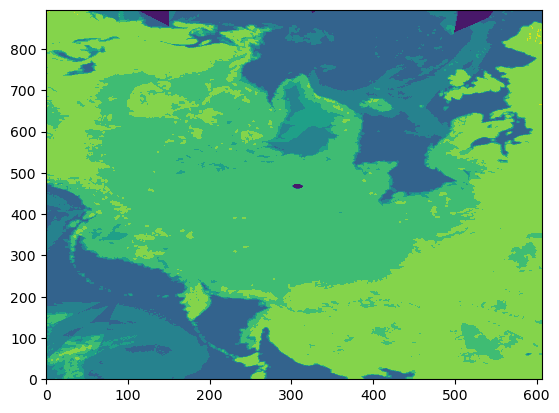

In [7]:
import netCDF4 as nc

dc = "../"

fn = dc+"Data_Sat/AMSR_E_L3_SeaIce12km_V15_20090403.hdf"
#fn = "Documents/BachelorProject/Data_Sat/AMSR_E_L3_SeaIce12km_V15_20090403.hdf"
ds = nc.Dataset(fn)

test = ds.variables['SI_12km_NH_18H_DAY']

x = len(test[:,0])
y = len(test[0,:])

#plt.scatter(x,y,test
test[:,0]
plt.contourf(test[:,:])

In [321]:
import numpy as np

f = open(dc+"Fortran/grid/psn12lats_v3.dat", "r")
lat = np.fromfile(f, dtype=np.int32)*1e-5

f = open(dc+"Fortran/grid/psn12lons_v3.dat", "r")
lon = np.fromfile(f, dtype=np.int32)*1e-5
f.close()

print(np.shape(lat),np.shape(lon))

(544768,) (544768,)


In [307]:
latMax = 896
lonMax = 608

In [308]:
index = 303

print('',np.round(lat[index],2))
print(np.round(lon[index],2))

 39.47
135.55


In [309]:
satlat = lat.reshape(latMax,lonMax)
satlon = lon.reshape(latMax,lonMax)

satlon[satlon < 0] += 360

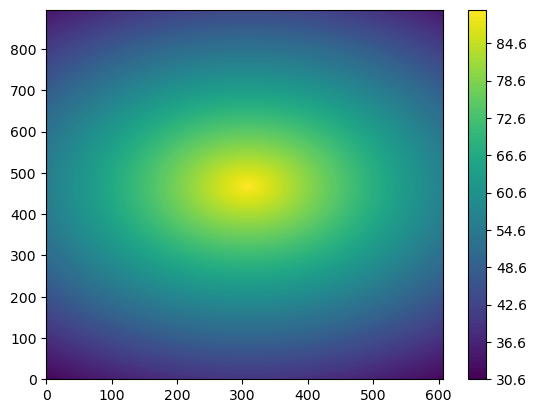

In [311]:
plt.contourf(lats,100)
plt.colorbar()

In [320]:
x = int(latMax-1)
y = 0#int(lonMax-1)
print('',np.round(lats[x,y],2))
print(np.round(lons[x,y],2))

 33.99
279.27


In [305]:
y

308

In [312]:
np.max(lats)

89.91841000000001